In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import MaxPooling2D,Reshape,Convolution2D,Dropout,UpSampling2D,ZeroPadding2D,Flatten, Dense,Input,AveragePooling2D
from keras.models import Sequential,load_model,Model
from keras.utils import np_utils

Using TensorFlow backend.


# Data Preparation

In [2]:
data = pd.read_csv('MNIST.csv')
print(data.shape)
print(data.columns)

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [11]:
X = data.values
Y = X[:,0]
X = X[:,1:]/255.0
X = X.reshape(-1,28,28,1)

print(X.shape,Y.shape)

(42000, 28, 28, 1) (42000,)


# Model Preaparation

In [8]:
# ENCODER
inp = Input(shape = (28,28,1))
cnv1 = Convolution2D(64,(3,3),activation = 'relu')(inp)
cnv2 = Convolution2D(32,(3,3),activation = 'relu')(cnv1)
avg1 = AveragePooling2D((2,2))(cnv2)
cnv3 = Convolution2D(32,(3,3),activation= 'relu',padding = 'same')(avg1)
cnv4 = Convolution2D(16,(3,3),activation = 'relu')(cnv3)
avg2 = AveragePooling2D((2,2))(cnv4)
cnv5 = Convolution2D(16,(3,3),activation='relu')(avg2)
flat1 = Flatten()(cnv5)
den1 = Dense(64,activation='relu')(flat1)

encoder = Model(input = inp,output= den1)

#DECODER

den2 = Dense(800,activation = 'relu')(den1)
rsh = Reshape(target_shape = (10,10,8))(den2)
cnv6 = Convolution2D(16,(3,3),padding = 'same')(rsh)
pad1 = ZeroPadding2D((1,1))(cnv6)
cnv7 = Convolution2D(32,(3,3),padding = 'same')(pad1)
ups = UpSampling2D((2,2))(cnv7)
pad2 = ZeroPadding2D((1,1))(ups)
cnv8 = Convolution2D(64,(3,3),padding='same')(pad2)
pad3 = ZeroPadding2D((1,1))(cnv8)
cnv9 = Convolution2D(1,(3,3),padding='same')(pad3)

model = Model(input = inp,output=cnv9)
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
average_pooling2d_9 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 10, 10, 16)        4624      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [9]:
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])

In [14]:
hist = model.fit(X,X,epochs = 20,shuffle=True,batch_size=512,validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 61s 2ms/step - loss: 0.0616 - acc: 0.7999 - val_loss: 0.0382 - val_acc: 0.8056
Epoch 2/20
33600/33600 [==============================] - 45s 1ms/step - loss: 0.0306 - acc: 0.8081 - val_loss: 0.0256 - val_acc: 0.8111
Epoch 3/20
33600/33600 [==============================] - 57s 2ms/step - loss: 0.0235 - acc: 0.8111 - val_loss: 0.0214 - val_acc: 0.8128
Epoch 4/20
33600/33600 [==============================] - 50s 1ms/step - loss: 0.0202 - acc: 0.8123 - val_loss: 0.0189 - val_acc: 0.8136
Epoch 5/20
33600/33600 [==============================] - 46s 1ms/step - loss: 0.0182 - acc: 0.8129 - val_loss: 0.0172 - val_acc: 0.8139
Epoch 6/20
33600/33600 [==============================] - 39s 1ms/step - loss: 0.0168 - acc: 0.8133 - val_loss: 0.0164 - val_acc: 0.8142
Epoch 7/20
33600/33600 [==============================] - 48s 1ms/step - loss: 0.0158 - acc: 0.8135 - val_loss: 0.0154 - val_acc:

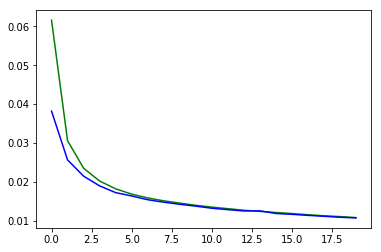

In [15]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

In [16]:
encoder.save('encoder.h5')

(10, 28, 28) (10, 28, 28)


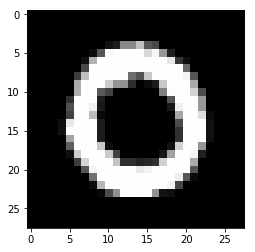

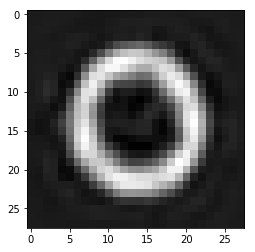

####################################################################################################


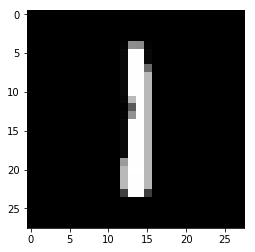

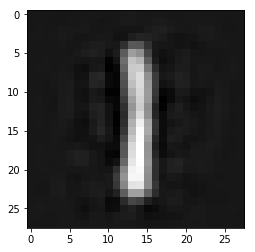

####################################################################################################


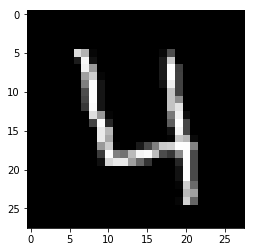

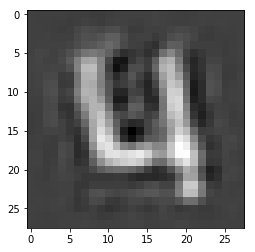

####################################################################################################


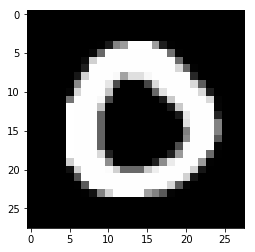

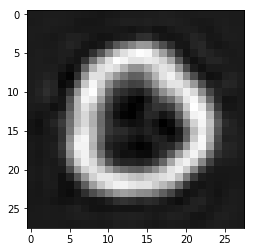

####################################################################################################


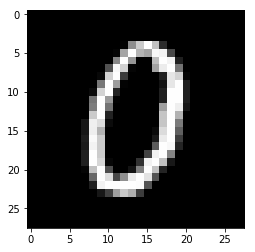

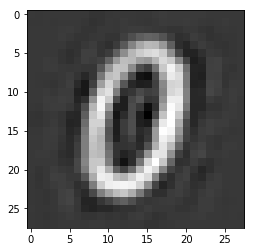

####################################################################################################


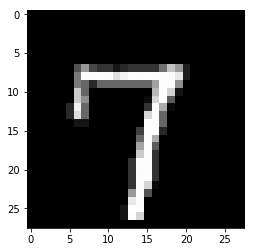

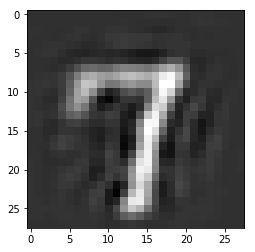

####################################################################################################


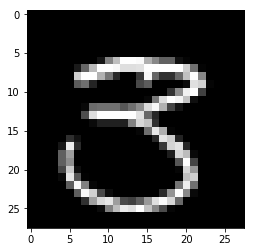

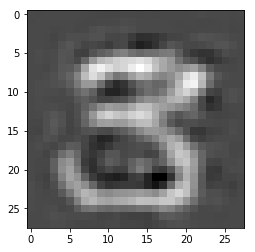

####################################################################################################


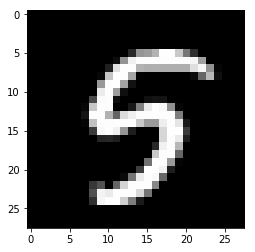

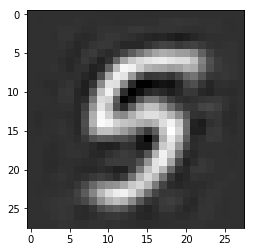

####################################################################################################


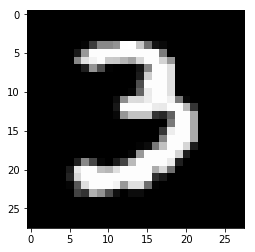

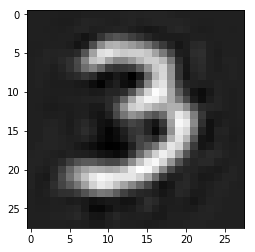

####################################################################################################


In [17]:
X_in = X[:10,:]
Y_out = model.predict(X_in)

X_in = X_in.reshape((X_in.shape[0],28,28))
Y_out = Y_out.reshape((Y_out.shape[0],28,28))
print(X_in.shape,Y_out.shape)

for ix in range(1,10):
    plt.figure(ix)
    plt.imshow(X_in[ix],cmap='gray')
    plt.figure(3*ix)
    plt.imshow(Y_out[ix],cmap='gray')
    plt.show()
    print (100*'#')
